<a href="https://colab.research.google.com/github/joymuli10/Moringa_DataScience_Prep_W4_IP/blob/master/Week_Two_Moringa_School_Core_Joy_Muli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the question

# Which individuals are most likely to use or have a bank account?

# Defining the Metric for success

# Understanding the design

# Recording the experimental design

# Data Relevance

## 2. Reading the Data

In [ ]:
# Loading the Data from the source i.e. csv
# ---
# Dataset url = http://bit.ly/FinancialDataset
# ---
#Importing our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# ---
f_inclusion = pd.read_csv("http://bit.ly/FinancialDataset")

## 3. Checking the Data

In [ ]:
#Prevewing the top of our dataset
f_inclusion.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#Checking the bottom of our dataset
f_inclusion.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
#Checking the number of rows and columns
f_inclusion.shape

(23524, 13)

In [ ]:
for i in f_inclusion.columns:
    print(i,f_inclusion[i].unique())
    print("-----")

country ['Kenya' 'Rwanda' 'Tanzania' nan 'Uganda']
-----
year [2018 2029 2056 2016 2039 2017]
-----
uniqueid ['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']
-----
Has a Bank account ['Yes' 'No' nan]
-----
Type of Location ['Rural' 'Urban' nan]
-----
Cell Phone Access ['Yes' 'No' nan]
-----
household_size [ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21. nan
  0. 18. 17. 20.]
-----
Respondent Age [ 24.  70.  26.  34.  32.  42.  54.  76.  40.  69.  64.  31.  38.  47.
  27.  48.  25.  21.  18.  22.  58.  55.  62.  29.  35.  45.  67.  19.
  80.  66.  50.  33.  28.  51.  16.  17.  30.  37.  59.  65.  46.  56.
  52.  23.  43.  49.  44.  72.  53.  63.  39.  81.  78.  36.  20.  60.
  95.  71.  57.  85.  68.  41.  61.  75.  86.  73.  nan  93.  74.  88.
  90.  77.  84.  82.  89.  79.  83.  94.  87.  92.  91.  98.  97.  96.
  99. 100.]
-----
gender_of_respondent ['Female' 'Male' nan]
-----
The relathip with head ['Spouse' 'Head of H

In [ ]:
# Checking whether each column has an appropriate datatype
f_inclusion.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

## Tidying the Dataset

In [ ]:
#Data cleaning procedures
#Renaming columns 
f_inclusion = f_inclusion.rename(columns={'uniqueid' : 'unique_id', 'Has a Bank account' : 'owns_a_bank_account', 'Type of Location' : 'location_type', 'Cell Phone Access' : 'cell_phone_access', 'Respondent Age' : 'respondent_age', 'gender_of_respondent' : 'respondent_gender', 'The relathip with head' : 'relationship_with_head', 'Level of Educuation' : 'education_level', 'Type of Job' : 'job_type'})
f_inclusion.head(2)

,country,year,unique_id,owns_a_bank_account,location_type,cell_phone_access,household_size,respondent_age,respondent_gender,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


In [ ]:
f_inclusion.head(3)

,country,year,unique_id,owns_a_bank_account,location_type,cell_phone_access,household_size,respondent_age,respondent_gender,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


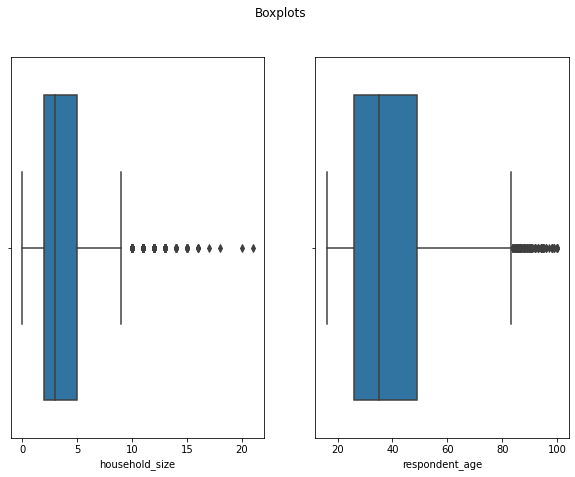

In [ ]:
# Checking for Outliers
fig, ((ax1), (ax2)) = plt.subplots(1,2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(f_inclusion['household_size'], ax=ax1)
sns.boxplot(f_inclusion['respondent_age'], ax=ax2)

plt.show()

In [ ]:
# Checking for Anomalies
#
q1_hs = f_inclusion['household_size'].quantile(.25)
q3_hs = f_inclusion['household_size'].quantile(.75)

iqr_hs = q3_hs - q1_hs


q1_ra = f_inclusion['respondent_age'].quantile(.25)
q3_ra = f_inclusion['respondent_age'].quantile(.75)

iqr_ra = q3_ra - q1_ra

print(iqr_hs, iqr_ra)

3.0 23.0


In [ ]:
#Removing the outliers
#If you remove outiers, you can check if it was the right thing to do by .skew()
#df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
Q1 = f_inclusion.quantile(0.25)
Q3 = f_inclusion.quantile(0.75)
IQR = Q3 - Q1
F_inclusion = f_inclusion[~((f_inclusion < (Q1 - 1.5 * IQR)) | (f_inclusion > (Q3 + 1.5 * IQR))).any(axis=1)]
print(F_inclusion.shape)
print(f_inclusion.shape)

(22903, 13)
(23524, 13)


In [ ]:
#Checking if we made the right decision by removing the outliers
#If the answer is a positive then it was definitely a good decision
F_inclusion.skew()

year              0.063181
household_size    0.610733
respondent_age    0.740975
dtype: float64

In [ ]:
#Identifying missing data
F_inclusion.isnull().sum()

country                   14
year                       0
unique_id                  0
owns_a_bank_account       36
location_type             15
cell_phone_access         11
household_size            27
respondent_age            33
respondent_gender         33
relationship_with_head     4
marital_status            31
education_level           29
job_type                  30
dtype: int64

In [ ]:
#Dealing with missing values
F_inclusion.fillna( method ='ffill', inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
F_inclusion.isnull().sum()

country                   0
year                      0
unique_id                 0
owns_a_bank_account       0
location_type             0
cell_phone_access         0
household_size            0
respondent_age            0
respondent_gender         0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [ ]:
#Dropping unnecessary columns
F_inclusion.drop(['unique_id'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
F_inclusion.dtypes

country                    object
year                        int64
owns_a_bank_account        object
location_type              object
cell_phone_access          object
household_size            float64
respondent_age            float64
respondent_gender          object
relationship_with_head     object
marital_status             object
education_level            object
job_type                   object
dtype: object

# Exploratory Analysis

**Uniariate Analysis**

In [ ]:
#Check the mean, mode, median, std, var, covarr, range, kurt 
#For the numerical variables i.e household_size and respondent_age
F_inclusion['respondent_age'].mean()

38.337554032222855

In [ ]:
F_inclusion['respondent_age'].mode()

0    30.0
dtype: float64

In [ ]:
F_inclusion['respondent_age'].median()

35.0

In [ ]:
F_inclusion['respondent_age'].std()

15.801188411812745

In [ ]:
F_inclusion['respondent_age'].var()

249.67755522560537

In [ ]:
# Finding the min and max values of the respondents age
F_inclusion_max = F_inclusion['respondent_age'].max()
F_inclusion_min = F_inclusion['respondent_age'].min()
Range = F_inclusion_max - F_inclusion_min
print(Range)

67.0


In [ ]:
#Checking the age quantiles
F_inclusion["respondent_age"].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    48.0
Name: respondent_age, dtype: float64

In [ ]:
F_inclusion["respondent_age"].skew()

0.7411870091957976

In [ ]:
F_inclusion["respondent_age"].kurt()

-0.2359816624341824

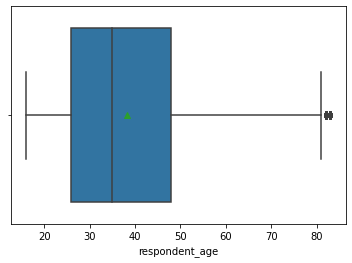

In [ ]:
#Plotting a boxplot
#This shows us several factors including the quartiles, outliers and what their values are.
# It also shows you if your data is symmetrical, 
# how tightly your data is grouped, and if and how your data is skewed.
sns.boxplot(F_inclusion["respondent_age"], showmeans=True)

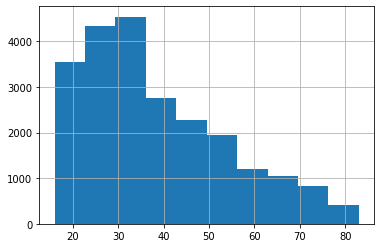

In [ ]:
#Plot a histogram(numerical variables)

F_inclusion['respondent_age'].hist()

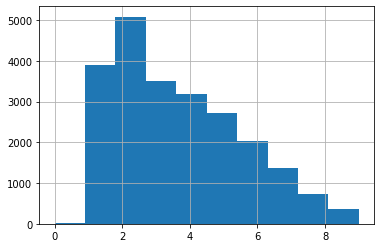

In [ ]:
F_inclusion['household_size'].hist()

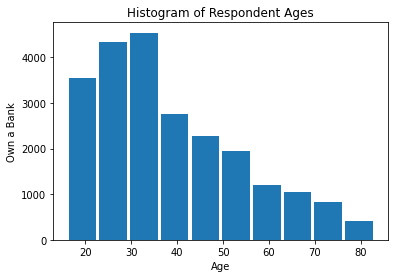

In [ ]:
f_age = F_inclusion['respondent_age']
plt.hist(f_age, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('Age')
plt.ylabel('Own a Bank')
plt.title('Histogram of Respondent Ages')
plt.show()

Text(0, 0.5, 'Count')

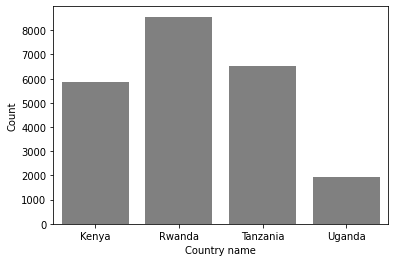

In [ ]:
##Categorical Variables
# Creating Frequency table of the columns
sns.countplot(F_inclusion['country'], color='grey',saturation=0.5)
plt.xlabel('Country name')
plt.ylabel('Count')

Most of the data came from Rwanda while the least is from Uganda

Text(0, 0.5, 'Count')

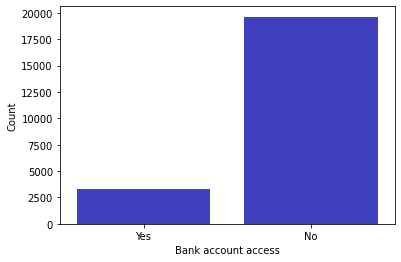

In [ ]:
sns.countplot(F_inclusion['owns_a_bank_account'], color='blue',saturation=0.5)
plt.xlabel('Bank account access')
plt.ylabel('Count')

We can see that most of the population do not own bank accounts

Text(0, 0.5, 'Count')

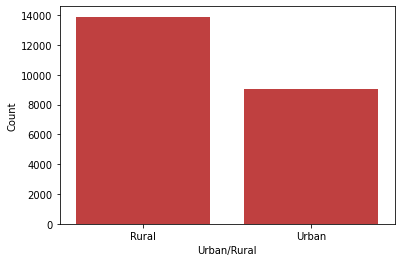

In [ ]:
sns.countplot(F_inclusion['location_type'], color='red',saturation=0.5)
plt.xlabel('Urban/Rural')
plt.ylabel('Count')

We can see that most of the population were from the rural areas

Text(0, 0.5, 'Count')

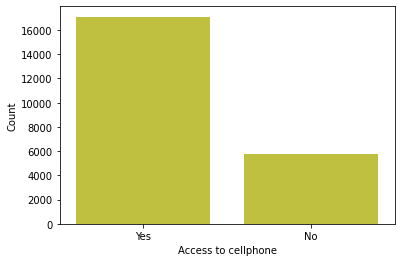

In [ ]:
sns.countplot(F_inclusion['cell_phone_access'], color='yellow',saturation=0.5)
plt.xlabel('Access to cellphone')
plt.ylabel('Count')

Most of the population have a cellphone

Text(0, 0.5, 'Count')

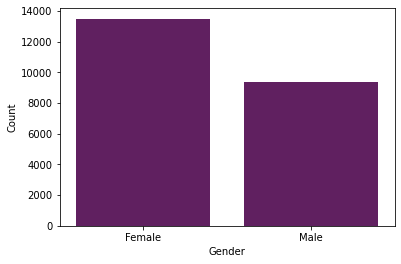

In [ ]:
sns.countplot(F_inclusion['respondent_gender'], color='purple',saturation=0.5)
plt.xlabel('Gender')
plt.ylabel('Count')

In [ ]:
The population is mostly compromised of female

In [ ]:
F_inclusion.relationship_with_head.value_counts()

Head of Household      12503
Spouse                  6407
Child                   2139
Parent                  1028
Other relative           645
Other non-relatives      181
Name: relationship_with_head, dtype: int64

In [ ]:
F_inclusion.marital_status.value_counts()

Married/Living together    10469
Single/Never Married        7833
Widowed                     2528
Divorced/Seperated          2065
Dont know                      8
Name: marital_status, dtype: int64

In [ ]:
F_inclusion.education_level.value_counts()

Primary education                  12535
No formal education                 4291
Secondary education                 4113
Tertiary education                  1146
Vocational/Specialised training      787
6                                     25
Other/Dont know/RTA                    6
Name: education_level, dtype: int64

In [ ]:
F_inclusion.job_type.value_counts()

Self employed                   6284
Informally employed             5527
Farming and Fishing             5315
Remittance Dependent            2389
Formally employed Private       1042
Other Income                    1029
No Income                        594
Formally employed Government     383
Government Dependent             221
Dont Know/Refuse to answer       119
Name: job_type, dtype: int64

In [ ]:
F_inclusion.dtypes

country                    object
year                        int64
owns_a_bank_account        object
location_type              object
cell_phone_access          object
household_size            float64
respondent_age            float64
respondent_gender          object
relationship_with_head     object
marital_status             object
education_level            object
job_type                   object
dtype: object

In [ ]:
df1 = F_inclusion[['owns_a_bank_account', 'country']]
#Plot a pie chart

**Bivariate Analysis**

In [ ]:
df2 = F_inclusion[['respondent_age', 'household_size']]


In [ ]:
df2.corr()

,respondent_age,household_size
respondent_age,1.000000,-0.105352
household_size,-0.105352,1.000000


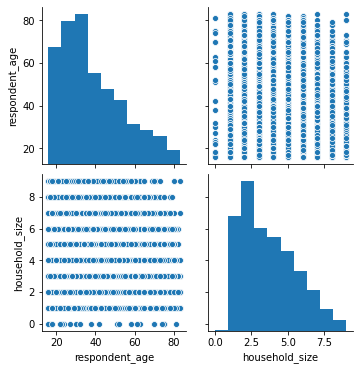

In [ ]:
sns.pairplot(df2)
plt.show()

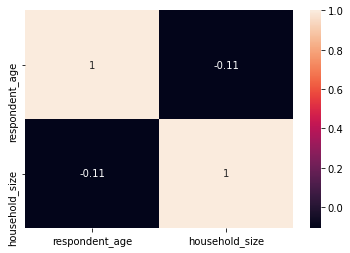

In [ ]:
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [ ]:
There is a weak negative correlation between the respondents' ages and the houshold size

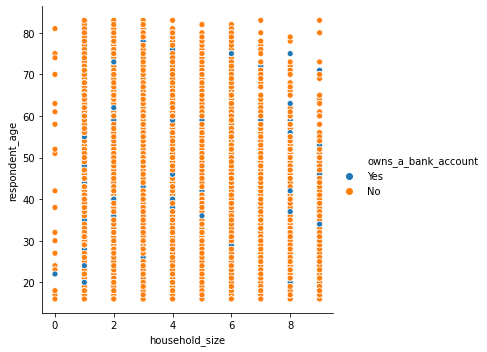

In [ ]:
sns.relplot(x = 'household_size', y = 'respondent_age', hue = 'owns_a_bank_account',data=F_inclusion)

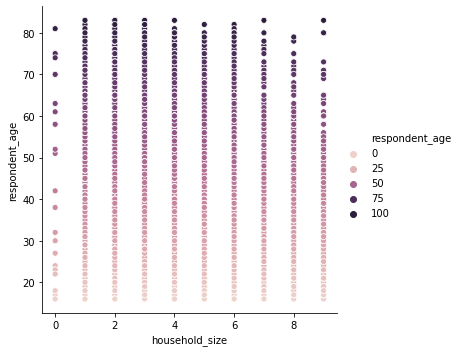

In [ ]:
sns.relplot(x = 'household_size', y = 'respondent_age', hue = 'respondent_age',data=F_inclusion)

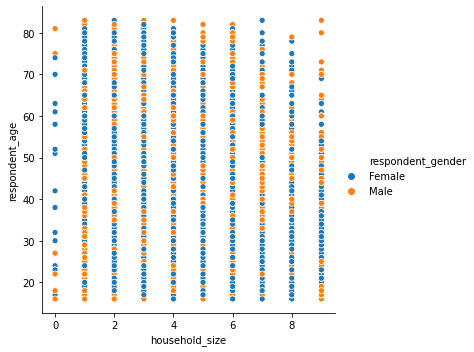

In [ ]:
sns.relplot(x = 'household_size', y = 'respondent_age', hue = 'respondent_gender',data=F_inclusion)

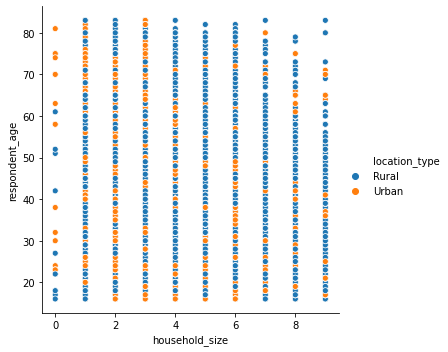

In [ ]:
sns.relplot(x = 'household_size', y = 'respondent_age', hue = 'location_type',data=F_inclusion)

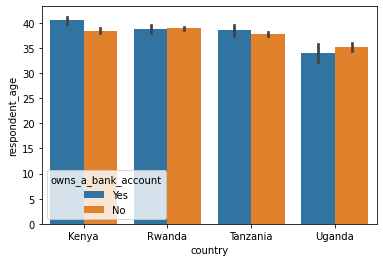

In [ ]:
sns.barplot(x = 'country', y = 'respondent_age', data = F_inclusion, hue = 'owns_a_bank_account')

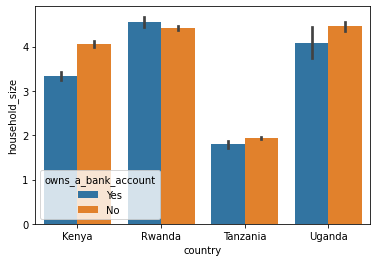

In [ ]:
sns.barplot(x = 'country', y = 'household_size', data = F_inclusion, hue = 'owns_a_bank_account')

In [ ]:
F_inclusion.groupby('country')['owns_a_bank_account'].value_counts()

country   owns_a_bank_account
Kenya     No                     4379
          Yes                    1492
Rwanda    No                     7576
          Yes                     986
Tanzania  No                     5924
          Yes                     619
Uganda    No                     1761
          Yes                     166
Name: owns_a_bank_account, dtype: int64

In [ ]:
F_inclusion.groupby('country')['respondent_gender'].value_counts()

country   respondent_gender
Kenya     Female               3371
          Male                 2500
Rwanda    Female               5099
          Male                 3463
Tanzania  Female               3762
          Male                 2781
Uganda    Female               1272
          Male                  655
Name: respondent_gender, dtype: int64

In [ ]:
F_inclusion.groupby('country')['location_type'].value_counts()

country   location_type
Kenya     Rural            3388
          Urban            2483
Rwanda    Rural            7338
          Urban            1224
Tanzania  Urban            4744
          Rural            1799
Uganda    Rural            1362
          Urban             565
Name: location_type, dtype: int64

**Multivariate Analysis**

# Principal Component Analysis

In [ ]:
F_inclusion.dtypes